# Lending Club Loans Status Prediction - Part 1: Data Wrangling

When one borrower submits a loan application, the lender company will collected many information from him/her, and based on the information collected, they will run their algorithm and try to predict if the customer will be able to or will be willing to fully paid the loans. Then they will either approve or deny the loan application. So the prediction must be as accurate as possible, otherwise the lending companny will either loss business opportunity or loss profit.

In this study, we will use Lending Club's data from kaggle (https://www.kaggle.com/wordsforthewise/lending-club), and build a model to predict the loan's future status. 

This is the first part of the study. In this part, we will have a careful look on the data, and reduce the data size by dropping some unnecessary columns and rows. 

## Content:
## 1. Import data;
## 2. Remove columns with too many missing values;
## 3. Remove columns high correlated with other columns;
## 4. Drop columns with poor correlation to target variable;
## 5. Remove categorical columns with large amount of unique values;
## 6. Remove rows with missing value;
## 7. Check outliners;
## 8. Write data to file, conclusions.

# 1. Import data

In [1]:
# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read source data
data_lc = pd.read_csv('../Raw_data/accepted_2007_to_2018Q4.csv')

C:\Users\cheng\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


The first thing we want to do is to check our data size.

In [3]:
data_lc.shape

(2260701, 151)

The data have more than 2.2 million rows and 151 columns! It is a huge data! Keep in mind that we surely will reduce the size of this data. How? We will first remove some columns and then rows which are less important to our model. This will be done later. First let's see features of our data.

In [4]:
data_lc.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


The head of the data shows us the column names and what the values look like. We already saw some missing data marked as "NaN". Now let's dig deeper into missing values.

Let's create a DataFrame to show the amount of missing values in each columns and also the percentage of missing values.

# 2. Remove columns with too many missing values

In [5]:
missing = pd.concat([data_lc.isnull().sum(), 100 * data_lc.isnull().mean()], axis=1)
missing.columns = ['Count', '%']

The default display row number is changed to 200 to show all the data as we requested. So that no values will be shows as '...'

In [6]:
pd.options.display.max_rows = 200

Let's see the list of columns with best quality, with less than 10% missing values.

In [7]:
missing[missing['%']<10].sort_values('%')

,Count,%
id,0,0.000000
revol_bal,33,0.001460
initial_list_status,33,0.001460
out_prncp,33,0.001460
out_prncp_inv,33,0.001460
total_pymnt,33,0.001460
total_pymnt_inv,33,0.001460
total_rec_prncp,33,0.001460
total_rec_int,33,0.001460
fico_range_high,33,0.001460


And also the columns with bad quality have to be shown. They are at risk to be removed!

In [8]:
missing[missing['%']>30].sort_values('%')

,Count,%
inq_fi,866162,38.313868
max_bal_bc,866162,38.313868
open_rv_24m,866162,38.313868
open_rv_12m,866162,38.313868
open_il_24m,866162,38.313868
open_il_12m,866162,38.313868
open_act_il,866162,38.313868
total_bal_il,866162,38.313868
open_acc_6m,866163,38.313912
total_cu_tl,866163,38.313912


We see some columns have more than 90% missing values. They are almost empty! Let's see how many columns have more than 30% missing values.

In [9]:
missing[missing['%']>30].count()

Count    58
%        58
dtype: int64

It shows that there are 58 columns have more than 30% missing values, a little bit more than 1/3 of total columns. So let's drop those columns out of our data.

In [10]:
drop_columns_1 = missing[missing['%']>30].index

In [11]:
len(drop_columns_1)

58

In [12]:
data_lc = data_lc.drop(columns = drop_columns_1)

Let's have a look how much data was left.

In [13]:
data_lc.shape

(2260701, 93)

We would like to list remaining columns.

In [14]:
data_lc.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'a

# 3. Remove columns high correlated with other columns

We believe that there might be high correlation between some columns. For those high correlated columns, they have similiar impact to our prediction. So we do not need to keep all of them. So we will remove those columns to make our model simpler.

In [15]:
cor = data_lc.corr().abs()
unstack_corr = cor.unstack()
pairs = unstack_corr.sort_values(ascending=False)

corr_pairs = pd.DataFrame(pairs).drop_duplicates().reset_index()
corr_pairs.columns = ['feature1', 'feature2', 'corr']

In [16]:
corr_pairs[corr_pairs['corr']>0.8]

,feature1,feature2,corr
0,loan_amnt,loan_amnt,1.000000
1,fico_range_low,fico_range_high,1.000000
2,out_prncp_inv,out_prncp,0.999999
3,loan_amnt,funded_amnt,0.999755
4,total_pymnt_inv,total_pymnt,0.999396
5,funded_amnt_inv,funded_amnt,0.999341
6,loan_amnt,funded_amnt_inv,0.999038
7,open_acc,num_sats,0.998966
8,num_actv_rev_tl,num_rev_tl_bal_gt_0,0.983638
9,tot_hi_cred_lim,tot_cur_bal,0.975582


Now let's drop columns with more than 0.8 correlation with other columns.

In [17]:
drop_columns_2 = ['fico_range_low','out_prncp_inv','funded_amnt','total_pymnt_inv','funded_amnt_inv','open_acc',
                  'num_rev_tl_bal_gt_0','tot_cur_bal','collection_recovery_fee','total_rec_prncp','installment',
                  'total_il_high_credit_limit','bc_util','last_fico_range_high','bc_open_to_buy','num_rev_accts',
                  'num_bc_sats','num_op_rev_tl','avg_cur_bal','num_actv_rev_tl','total_rev_hi_lim',
                  'num_rev_tl_bal_gt_0','num_tl_30dpd']

In [18]:
len(drop_columns_2)

23

In [19]:
data_lc = data_lc.drop(columns = drop_columns_2)

In [20]:
data_lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 71 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   loan_amnt                   float64
 2   term                        object 
 3   int_rate                    float64
 4   grade                       object 
 5   sub_grade                   object 
 6   emp_title                   object 
 7   emp_length                  object 
 8   home_ownership              object 
 9   annual_inc                  float64
 10  verification_status         object 
 11  issue_d                     object 
 12  loan_status                 object 
 13  pymnt_plan                  object 
 14  url                         object 
 15  purpose                     object 
 16  title                       object 
 17  zip_code                    object 
 18  addr_state                  object 
 19  dti                  

# 4. Drop columns with poor correlation to target variable

Now we would like to continue to remove a few more columns. Since our target is column 'loan_status', we would like 
to see the correlations between column 'loan_status' and all other numerical columns, and remove those with poor correlation.

First let's have a close look at the column 'loan_status'.

In [21]:
# count values for column 'loan_status'
data_lc['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

We would like to change "Does not meet the credit policy. Status:Fully Paid" to "Fully Paid", and "Does not meet 
the credit policy. Status:Charged Off" to "Charged Off". We will also change "Default" to "Charged off". Rows with other values in this column will be removed.
There are large amount of loans with status "current", which means the payment is on going well and we don't know if
they will be fully paid or charged off. They are of no use to our model so we will remove those rows.

In [22]:
data_lc['loan_status'].replace('Does not meet the credit policy. Status:Fully Paid', 'Fully Paid',inplace=True)
data_lc['loan_status'].replace('Does not meet the credit policy. Status:Charged Off', 'Charged Off',inplace=True)

In [23]:
data_lc['loan_status'].value_counts()

Fully Paid            1078739
Current                878317
Charged Off            269320
Late (31-120 days)      21467
In Grace Period          8436
Late (16-30 days)        4349
Default                    40
Name: loan_status, dtype: int64

In [24]:
data_lc = data_lc[data_lc['loan_status'].isin(['Charged Off','Fully Paid','Default'])]

In [25]:
data_lc['loan_status'].value_counts()

Fully Paid     1078739
Charged Off     269320
Default             40
Name: loan_status, dtype: int64

We would like to change 'Fully Paid' to 1, and 'Charged Off' and 'Default' to 0, and set them to be categorical.

In [26]:
data_lc['loan_status'].replace('Fully Paid', 1,inplace=True)
data_lc['loan_status'].replace('Charged Off',0,inplace=True)
data_lc['loan_status'].replace('Default',0,inplace=True)

In [27]:
data_lc['loan_status'].value_counts()

1    1078739
0     269360
Name: loan_status, dtype: int64

In [28]:
data_lc['loan_status'] = data_lc['loan_status'].astype('category')

In [29]:
data_lc['loan_status'].value_counts()

1    1078739
0     269360
Name: loan_status, dtype: int64

In [30]:
data_lc['loan_status'].describe()

count     1348099
unique          2
top             1
freq      1078739
Name: loan_status, dtype: int64

Let's list the names of columns with numerical values.

In [31]:
columns_dtype_is_float = data_lc.select_dtypes('float').columns

In [32]:
columns_dtype_is_float

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_high', 'inq_last_6mths', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'acc_open_past_24mths',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_bc_tl', 'num_il_tl',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit'],
      dtype='object')

Let's calculate the correlation between column 'loan_status' and all other numerical columns.

In [33]:
col_corr = []
data_lc_corr = []
for item in columns_dtype_is_float:
    data_lc_corr.append(abs(data_lc['loan_status'].corr(data_lc[item])))
    col_corr.append(item)

In [34]:
df_corr = pd.DataFrame({'column':col_corr, 'correlation':data_lc_corr})

In [35]:
df_corr.sort_values('correlation')

,column,correlation
21,tot_coll_amt,0.000447
37,num_tl_120dpd_2m,0.001294
24,delinq_amnt,0.002785
23,chargeoff_within_12_mths,0.003147
45,total_bal_ex_mort,0.003766
20,acc_now_delinq,0.003895
35,num_il_tl,0.006382
11,out_prncp,0.008320
43,tax_liens,0.009690
38,num_tl_90g_dpd_24m,0.009887


We want to find all columns with a correlation smaller than 0.06

In [36]:
df_corr[df_corr['correlation']<0.06]['column']

2                     annual_inc
4                    delinq_2yrs
7                        pub_rec
8                      revol_bal
9                     revol_util
10                     total_acc
11                     out_prncp
13                 total_rec_int
18    collections_12_mths_ex_med
20                acc_now_delinq
21                  tot_coll_amt
23      chargeoff_within_12_mths
24                   delinq_amnt
25            mo_sin_old_il_acct
26          mo_sin_old_rev_tl_op
27         mo_sin_rcnt_rev_tl_op
28                mo_sin_rcnt_tl
30          mths_since_recent_bc
31         mths_since_recent_inq
32         num_accts_ever_120_pd
33                num_actv_bc_tl
34                     num_bc_tl
35                     num_il_tl
36                      num_sats
37              num_tl_120dpd_2m
38            num_tl_90g_dpd_24m
40                pct_tl_nvr_dlq
42          pub_rec_bankruptcies
43                     tax_liens
45             total_bal_ex_mort
Name: colu

We see the highest correlation is found at column 'last_fico_range_low'. We are curious to see the distribution of all values in this column when 'loan_status' = 1 and 'loan_status' = 0 respectively.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '500.0'),
  Text(2, 0, '505.0'),
  Text(3, 0, '510.0'),
  Text(4, 0, '515.0'),
  Text(5, 0, '520.0'),
  Text(6, 0, '525.0'),
  Text(7, 0, '530.0'),
  Text(8, 0, '535.0'),
  Text(9, 0, '540.0'),
  Text(10, 0, '545.0'),
  Text(11, 0, '550.0'),
  Text(12, 0, '555.0'),
  Text(13, 0, '560.0'),
  Text(14, 0, '565.0'),
  Text(15, 0, '570.0'),
  Text(16, 0, '575.0'),
  Text(17, 0, '580.0'),
  Text(18, 0, '585.0'),
  Text(19, 0, '590.0'),
  Text(20, 0, '595.0'),
  Text(21, 0, '600.0'),
  Text(22, 0, '605.0'),
  Text(23, 0, '610.0'),
  Text(24, 0, '615.0'),
  Text(25, 0, '620.0'),
  Text(26, 0, '625.0'),
  Text(27, 0, '630.0'),
  Text(28, 0, 

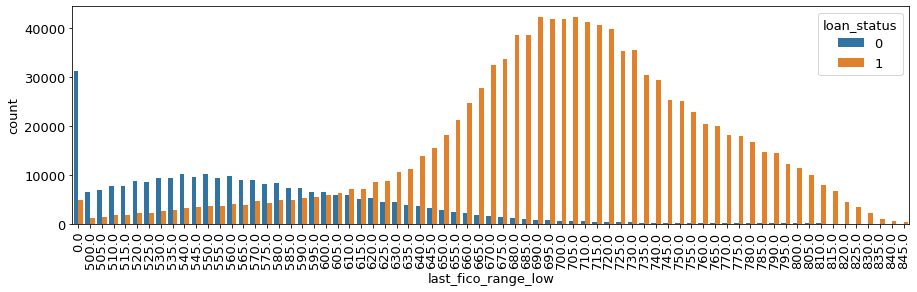

In [37]:
plt.rc('font', size=13)
plt.figure(figsize=(15,4))
sns.countplot(x='last_fico_range_low', data = data_lc, hue='loan_status')
plt.xticks(rotation = 90)

From the plot above, it is shown very clearly that the distribution of values in 'last_fico_range_low' are totally different when loan_status is different. Thus it is predicted that this column will play an important role in our 
modeling.

It is time to list columns with low correlation with 'loan_status' and remove them.

In [38]:
drop_columns_3 = ['delinq_2yrs', 'pub_rec', 'revol_bal', 'total_acc', 'total_rec_int', 'collections_12_mths_ex_med', 
                  'acc_now_delinq', 'tot_coll_amt', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 
                  'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 
                  'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_bc_tl', 'num_il_tl', 
                  'num_sats', 'num_tl_120dpd_2m', 'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies', 
                  'tax_liens', 'total_bal_ex_mort']

In [39]:
len(drop_columns_3)

27

In [40]:
data_lc = data_lc.drop(columns = drop_columns_3)

In [41]:
data_lc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348099 entries, 0 to 2260697
Data columns (total 44 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   id                    1348099 non-null  object  
 1   loan_amnt             1348099 non-null  float64 
 2   term                  1348099 non-null  object  
 3   int_rate              1348099 non-null  float64 
 4   grade                 1348099 non-null  object  
 5   sub_grade             1348099 non-null  object  
 6   emp_title             1262149 non-null  object  
 7   emp_length            1269549 non-null  object  
 8   home_ownership        1348099 non-null  object  
 9   annual_inc            1348095 non-null  float64 
 10  verification_status   1348099 non-null  object  
 11  issue_d               1348099 non-null  object  
 12  loan_status           1348099 non-null  category
 13  pymnt_plan            1348099 non-null  object  
 14  url               

Ok we already removed quite a few columns with missing values and others with numerical data. Now let's see those
columns with object values.

# 5. Remove categorical columns with large amount of unique values

So far we have done much on numerical columns. Now let's have a look on categorical columns. We will count their unique values. Columns with large amount of unique values are about to be removed as we believe they have little effect on loan status. 

In [42]:
columns_dtype_is_object = data_lc.select_dtypes('object').columns

In [43]:
columns_dtype_is_object

Index(['id', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')

In [44]:
len(columns_dtype_is_object)

23

They are totally 23 columns with object type values. We need to study them one by one.

In [45]:
data_lc['id'].unique()

array([68407277, 68355089, 68341763, ..., '89996426', '90006534',
       '88224441'], dtype=object)

There are too many unique values in column 'id'. Actually we doubt that every row has a unique value. There is no way this column will have impact on our model so let's put it in our 'will-drop' list.

In [46]:
data_lc['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [47]:
data_lc['grade'].unique()

array(['C', 'B', 'F', 'A', 'E', 'D', 'G'], dtype=object)

In [48]:
data_lc['sub_grade'].unique()

array(['C4', 'C1', 'B4', 'F1', 'C3', 'B2', 'B1', 'A2', 'B5', 'C2', 'E2',
       'A4', 'E3', 'C5', 'A1', 'D4', 'F3', 'D1', 'B3', 'D3', 'D5', 'A5',
       'F2', 'E4', 'D2', 'E1', 'F5', 'E5', 'A3', 'G2', 'G1', 'G3', 'G4',
       'F4', 'G5'], dtype=object)

'term' only has a few values and we believe it is important to our model. So let's keep it. 'sub_grade' is blieved to be at lower level than 'grade'. So we would like to drop 'sub_grade' and keep 'grade'.

In [49]:
data_lc['emp_title'].nunique()

379863

In [50]:
data_lc['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '7 years', '8 years',
       '2 years', '5 years', '9 years', '< 1 year', '1 year', nan],
      dtype=object)

Let's keep 'emp_length' and remove 'emp_title'. 

In [51]:
data_lc['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [52]:
data_lc['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [53]:
data_lc['issue_d'].unique()

array(['Dec-2015', 'Nov-2015', 'Oct-2015', 'Sep-2015', 'Aug-2015',
       'Jul-2015', 'Jun-2015', 'May-2015', 'Apr-2015', 'Mar-2015',
       'Feb-2015', 'Jan-2015', 'Mar-2018', 'Feb-2018', 'Jan-2018',
       'Sep-2017', 'Aug-2017', 'Jul-2017', 'Jun-2016', 'May-2016',
       'Apr-2016', 'Sep-2018', 'Aug-2018', 'Jul-2018', 'Jun-2017',
       'May-2017', 'Apr-2017', 'Mar-2016', 'Feb-2016', 'Jan-2016',
       'Dec-2014', 'Nov-2014', 'Oct-2014', 'Sep-2014', 'Aug-2014',
       'Jul-2014', 'Jun-2014', 'May-2014', 'Apr-2014', 'Mar-2014',
       'Feb-2014', 'Jan-2014', 'Dec-2018', 'Nov-2018', 'Oct-2018',
       'Jun-2018', 'May-2018', 'Apr-2018', 'Dec-2011', 'Nov-2011',
       'Oct-2011', 'Sep-2011', 'Aug-2011', 'Jul-2011', 'Jun-2011',
       'May-2011', 'Apr-2011', 'Mar-2011', 'Feb-2011', 'Jan-2011',
       'Dec-2010', 'Nov-2010', 'Oct-2010', 'Sep-2010', 'Aug-2010',
       'Jul-2010', 'Jun-2010', 'May-2010', 'Apr-2010', 'Mar-2010',
       'Feb-2010', 'Jan-2010', 'Dec-2009', 'Nov-2009', 'Oct-20

'issue_d' has large amount of unique values and we don't think they will have impact to our model. So we will remove it.

In [54]:
data_lc['pymnt_plan'].unique()

array(['n'], dtype=object)

After some rows are removed, there is only single value left in column 'pymnt_plan'. So it also should be removed.

In [55]:
data_lc['purpose'].unique()

array(['debt_consolidation', 'small_business', 'home_improvement',
       'major_purchase', 'credit_card', 'other', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [56]:
data_lc['title'].unique()

array(['Debt consolidation', 'Business', nan, ..., 'takeitaway',
       'Creditt Card Loan', 'debt reduction/hone updates'], dtype=object)

In [57]:
data_lc['title'].nunique()

63152

In [58]:
data_lc['zip_code'].nunique()

945

There all too many unique values in 'title' and 'zip_code', which indicate that they have very little influence to our
model. So we will remove them.

In [59]:
data_lc['addr_state'].unique()

array(['PA', 'SD', 'IL', 'GA', 'MN', 'SC', 'RI', 'NC', 'CA', 'VA', 'AZ',
       'IN', 'MD', 'NY', 'TX', 'KS', 'NM', 'AL', 'WA', 'OH', 'LA', 'FL',
       'CO', 'MI', 'MO', 'DC', 'MA', 'WI', 'HI', 'VT', 'NJ', 'DE', 'TN',
       'NH', 'NE', 'OR', 'CT', 'AR', 'NV', 'WV', 'MT', 'WY', 'OK', 'KY',
       'MS', 'UT', 'ND', 'ME', 'AK', 'ID', 'IA'], dtype=object)

We believe the loan status is not related with which state the borrower is from. So we will remove column 'addr_state'.

In [60]:
data_lc['earliest_cr_line'].unique()

array(['Aug-2003', 'Dec-1999', 'Aug-2000', 'Jun-1998', 'Oct-1987',
       'Jun-1990', 'Feb-1999', 'Apr-2002', 'Nov-1994', 'Jun-1996',
       'Jun-2005', 'May-1984', 'Dec-2001', 'Nov-1993', 'Mar-2005',
       'May-2004', 'Jun-1991', 'May-2000', 'Oct-2011', 'May-1994',
       'Jul-2011', 'May-1991', 'May-2001', 'Jun-2002', 'Dec-1985',
       'Apr-2007', 'Feb-2002', 'Jun-2001', 'Oct-1996', 'Jan-2005',
       'Jul-2001', 'Aug-2004', 'Jun-2007', 'Jul-2004', 'Apr-2001',
       'May-1992', 'Oct-1999', 'Nov-2001', 'Jan-2001', 'Sep-2004',
       'Sep-2006', 'Oct-2002', 'Feb-1990', 'Aug-1987', 'Oct-1998',
       'Aug-2001', 'Feb-2004', 'Aug-2009', 'Jan-1999', 'Jun-2000',
       'Jan-2007', 'Aug-1997', 'Dec-1987', 'Feb-1996', 'Jun-2004',
       'Jun-1995', 'Oct-2004', 'Dec-2002', 'Aug-1986', 'Nov-2002',
       'Oct-2006', 'Sep-2000', 'Feb-2012', 'Apr-2005', 'Sep-1994',
       'Apr-1993', 'Sep-2007', 'Jan-1998', 'May-2008', 'Mar-2001',
       'Apr-1994', 'Apr-2003', 'Jan-2002', 'Jan-2011', 'Nov-20

In [61]:
data_lc['earliest_cr_line'].nunique()

739

The column 'earliest_cr_line' has impact on loan status, as a early date always means a better credit level. But the month in the date is not that important. So we would like to remove the month and only keep the year. We will not do it now but will do it later.

In [62]:
data_lc['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [63]:
data_lc['last_pymnt_d'].unique()

array(['Jan-2019', 'Jun-2016', 'Jun-2017', 'Jul-2016', 'May-2017',
       'Nov-2016', 'Jan-2017', 'Aug-2018', 'Apr-2017', 'Mar-2017',
       'Feb-2018', 'Sep-2016', 'Mar-2016', 'May-2016', 'Sep-2017',
       'Dec-2017', 'Nov-2018', 'Oct-2018', 'Aug-2016', 'Dec-2018',
       'Dec-2016', 'Nov-2017', 'Mar-2018', 'Aug-2017', 'Mar-2019',
       'Jul-2017', 'Feb-2017', 'Feb-2019', 'Oct-2016', 'Sep-2018',
       'Oct-2017', 'Apr-2018', 'May-2018', 'Apr-2016', 'Jan-2018',
       'Jul-2018', 'Jun-2018', 'Feb-2016', 'Jan-2016', nan, 'Dec-2015',
       'Nov-2015', 'Oct-2015', 'Sep-2015', 'Aug-2015', 'Jul-2015',
       'Jun-2015', 'May-2015', 'Apr-2015', 'Mar-2015', 'Feb-2015',
       'Jan-2015', 'Dec-2014', 'Nov-2014', 'Oct-2014', 'Sep-2014',
       'Aug-2014', 'Jul-2014', 'Jun-2014', 'May-2014', 'Apr-2014',
       'Mar-2014', 'Feb-2014', 'Apr-2013', 'Apr-2012', 'Nov-2012',
       'Jun-2013', 'Sep-2013', 'Jul-2012', 'Oct-2013', 'May-2013',
       'Oct-2012', 'Sep-2012', 'Dec-2012', 'Aug-2013', 'N

In [64]:
data_lc['last_credit_pull_d'].unique()

array(['Mar-2019', 'Mar-2018', 'May-2017', 'Nov-2018', 'Sep-2018',
       'Nov-2017', 'Aug-2018', 'Apr-2017', 'Jun-2016', 'Jan-2018',
       'Sep-2017', 'Dec-2017', 'Jul-2016', 'Jan-2019', 'Jun-2017',
       'Feb-2019', 'Dec-2018', 'Feb-2018', 'Aug-2017', 'Feb-2017',
       'May-2018', 'Dec-2016', 'Apr-2018', 'Jul-2018', 'Mar-2016',
       'Jun-2018', 'Oct-2017', 'Jul-2017', 'Oct-2018', 'Jan-2017',
       'Oct-2016', 'Apr-2016', 'Mar-2017', 'Aug-2016', 'Feb-2016',
       'Nov-2016', 'Sep-2016', 'Jan-2016', 'Dec-2015', 'May-2016', nan,
       'Nov-2015', 'Oct-2015', 'Sep-2015', 'Aug-2015', 'Jul-2015',
       'Jun-2015', 'May-2015', 'Apr-2015', 'Mar-2015', 'Feb-2015',
       'Jan-2015', 'Dec-2014', 'Nov-2014', 'Oct-2014', 'Sep-2014',
       'Aug-2014', 'Jul-2014', 'Jun-2014', 'May-2014', 'Apr-2014',
       'Mar-2014', 'Feb-2014', 'Jan-2014', 'Sep-2012', 'Jun-2012',
       'Dec-2012', 'Feb-2013', 'Feb-2012', 'Nov-2013', 'Apr-2012',
       'May-2013', 'Aug-2012', 'Sep-2013', 'Jan-2012', 'O

In [65]:
data_lc['application_type'].unique()

array(['Individual', 'Joint App'], dtype=object)

In [66]:
data_lc['hardship_flag'].unique()

array(['N'], dtype=object)

Like 'pymnt_plan', 'hardship_flag' also has only one value left. Let's remove it.

In [67]:
data_lc['disbursement_method'].unique()

array(['Cash', 'DirectPay'], dtype=object)

In [68]:
data_lc['debt_settlement_flag'].unique()

array(['N', 'Y'], dtype=object)

In [69]:
data_lc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348099 entries, 0 to 2260697
Data columns (total 44 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   id                    1348099 non-null  object  
 1   loan_amnt             1348099 non-null  float64 
 2   term                  1348099 non-null  object  
 3   int_rate              1348099 non-null  float64 
 4   grade                 1348099 non-null  object  
 5   sub_grade             1348099 non-null  object  
 6   emp_title             1262149 non-null  object  
 7   emp_length            1269549 non-null  object  
 8   home_ownership        1348099 non-null  object  
 9   annual_inc            1348095 non-null  float64 
 10  verification_status   1348099 non-null  object  
 11  issue_d               1348099 non-null  object  
 12  loan_status           1348099 non-null  category
 13  pymnt_plan            1348099 non-null  object  
 14  url               

We think 'last_pymnt_d' and 'last_credit_pull_d' should have no effect on loan status, so we would like to remove them, as well as a few othe columns we mentioned above.

In [70]:
drop_columns_4 = ['id','sub_grade','issue_d','pymnt_plan','emp_title','title','addr_state','zip_code',
                  'last_pymnt_d','last_credit_pull_d','url','hardship_flag']

In [71]:
len(drop_columns_4)

12

In [72]:
data_lc = data_lc.drop(columns = drop_columns_4)

We have dropped quite a few columns and now let's see what our new dataset look like. 

In [73]:
data_lc.shape

(1348099, 32)

In [74]:
data_lc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348099 entries, 0 to 2260697
Data columns (total 32 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   loan_amnt             1348099 non-null  float64 
 1   term                  1348099 non-null  object  
 2   int_rate              1348099 non-null  float64 
 3   grade                 1348099 non-null  object  
 4   emp_length            1269549 non-null  object  
 5   home_ownership        1348099 non-null  object  
 6   annual_inc            1348095 non-null  float64 
 7   verification_status   1348099 non-null  object  
 8   loan_status           1348099 non-null  category
 9   purpose               1348099 non-null  object  
 10  dti                   1347725 non-null  float64 
 11  earliest_cr_line      1348070 non-null  object  
 12  fico_range_high       1348099 non-null  float64 
 13  inq_last_6mths        1348069 non-null  float64 
 14  revol_util        

There are total 1348099 rows and 32 columns. It is now much smaller than the original one. Now let's plot the correlation matrix and see how it looks like.

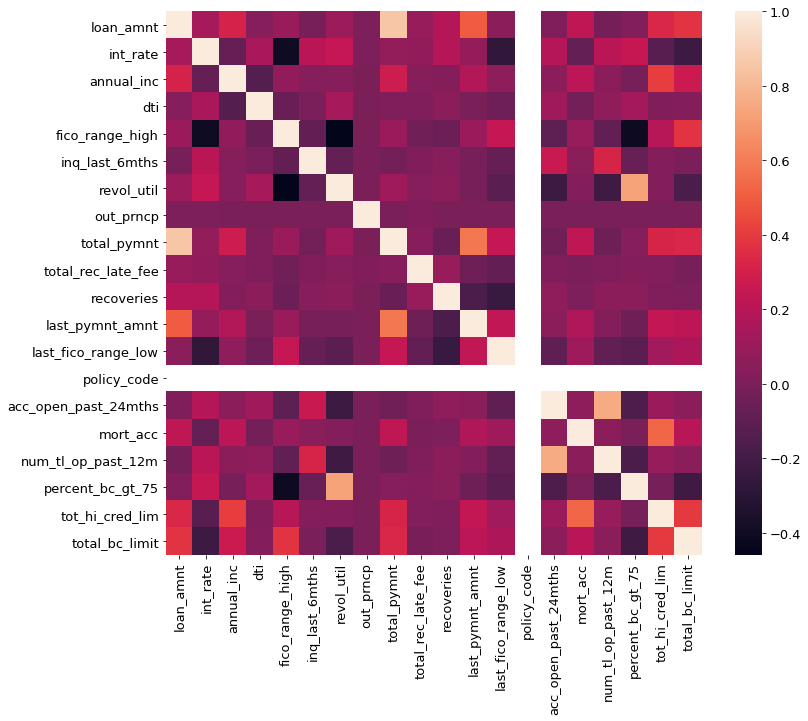

In [75]:
plt.subplots(figsize=(12,10))
sns.heatmap(data_lc.corr());

There are a few things which seems noticable. First, column 'policy_code' and 'out_prncp' is with no color. and the 
small square of 'loan_amnt' with 'total_pymnt' is very mild. We would like to have a look on them.

In [76]:
data_lc['policy_code'].unique()

array([1.])

In [77]:
data_lc['out_prncp'].unique()

array([    0.  , 21999.94, 25320.47, 22991.22,  9032.08,  2305.04,
        9321.75,  8586.55,  3510.59,  6213.22,  9050.79,  2792.69,
         468.01, 11105.05,  2026.17,  3250.42,  5311.24, 16520.39,
        5080.67, 15838.02, 22753.74,  1647.71,  2274.99,  4857.56,
       14185.71,  2786.98, 20405.73,  3376.73, 17881.12,  7369.59,
        1117.14,  8502.11,  1475.65, 28222.01, 27009.42,  8192.37,
        1990.99, 14928.28,  1951.95,  8052.16,  3226.84])

In [78]:
data_lc['total_pymnt'].corr(data_lc['loan_amnt'])

0.8543968774180337

It shows that columns 'policy_code' and 'out_prncp' only has single value, correlation of 'total_pymnt' and 'loan_amnt' is with high correlation. 

We also realize 'verification_status' shows that if the customer's income is verified or not. For those not verified, Lender Club could go ahead and verify it. So it is not a feature about our customer. It should also be removed. 

Thus let's remove those four columns.

In [79]:
drop_columns_5 = ['total_pymnt','policy_code','out_prncp','verification_status']

In [80]:
data_lc = data_lc.drop(columns = drop_columns_5)

# 6. Remove rows with missing value

Let's see missing values in each columns.

In [81]:
data_lc.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
grade                       0
emp_length              78550
home_ownership              0
annual_inc                  4
loan_status                 0
purpose                     0
dti                       374
earliest_cr_line           29
fico_range_high             0
inq_last_6mths             30
revol_util                897
initial_list_status         0
total_rec_late_fee          0
recoveries                  0
last_pymnt_amnt             0
last_fico_range_low         0
application_type            0
acc_open_past_24mths    50030
mort_acc                50030
num_tl_op_past_12m      70276
percent_bc_gt_75        64306
tot_hi_cred_lim         70276
total_bc_limit          50030
disbursement_method         0
debt_settlement_flag        0
dtype: int64

We can imagine that there is only small amount of missing values. So let's drop those rows with missing values.

In [82]:
data_lc = data_lc.dropna()

In [83]:
data_lc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188466 entries, 0 to 2260697
Data columns (total 28 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   loan_amnt             1188466 non-null  float64 
 1   term                  1188466 non-null  object  
 2   int_rate              1188466 non-null  float64 
 3   grade                 1188466 non-null  object  
 4   emp_length            1188466 non-null  object  
 5   home_ownership        1188466 non-null  object  
 6   annual_inc            1188466 non-null  float64 
 7   loan_status           1188466 non-null  category
 8   purpose               1188466 non-null  object  
 9   dti                   1188466 non-null  float64 
 10  earliest_cr_line      1188466 non-null  object  
 11  fico_range_high       1188466 non-null  float64 
 12  inq_last_6mths        1188466 non-null  float64 
 13  revol_util            1188466 non-null  float64 
 14  initial_list_statu

All missing data have been removed. And our final dataset is with 1188466 rows and 28 columns.

# 7. Check outliners

Next, we want to check any outliners in numerical columns. We will remove a few extreme outliners to avoid bias.

In [84]:
data_lc.describe()

,loan_amnt,int_rate,annual_inc,dti,fico_range_high,inq_last_6mths,revol_util,total_rec_late_fee,recoveries,last_pymnt_amnt,last_fico_range_low,acc_open_past_24mths,mort_acc,num_tl_op_past_12m,percent_bc_gt_75,tot_hi_cred_lim,total_bc_limit
count,1.188466e+06,1.188466e+06,1.188466e+06,1.188466e+06,1.188466e+06,1.188466e+06,1.188466e+06,1.188466e+06,1.188466e+06,1.188466e+06,1.188466e+06,1.188466e+06,1.188466e+06,1.188466e+06,1.188466e+06,1.188466e+06,1.188466e+06
mean,1.477169e+04,1.325446e+01,7.845298e+04,1.834333e+01,6.993496e+02,6.477888e-01,5.205513e+01,1.616041e+00,2.498789e+02,5.671179e+03,6.598787e+02,4.729307e+00,1.665535e+00,2.188749e+00,4.526088e+01,1.776699e+05,2.207220e+04
std,8.771317e+03,4.799233e+00,7.183009e+04,9.651526e+00,3.127451e+01,9.331672e-01,2.424714e+01,1.104999e+01,9.745025e+02,7.268310e+03,1.330086e+02,3.197327e+00,1.993884e+00,1.848688e+00,3.592333e+01,1.792923e+05,2.160921e+04
min,1.000000e+03,5.310000e+00,3.300000e+01,-1.000000e+00,6.640000e+02,0.000000e+00,0.000000e+00,-5.100000e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+02,1.000000e+02
25%,8.000000e+03,9.750000e+00,4.800000e+04,1.194000e+01,6.740000e+02,0.000000e+00,3.390000e+01,0.000000e+00,0.000000e+00,4.300200e+02,6.250000e+02,2.000000e+00,0.000000e+00,1.000000e+00,1.110000e+01,5.126000e+04,8.000000e+03
50%,1.260000e+04,1.274000e+01,6.600000e+04,1.772000e+01,6.940000e+02,0.000000e+00,5.240000e+01,0.000000e+00,0.000000e+00,2.359620e+03,6.900000e+02,4.000000e+00,1.000000e+00,2.000000e+00,4.290000e+01,1.158465e+05,1.550000e+04
75%,2.000000e+04,1.601000e+01,9.380500e+04,2.419000e+01,7.140000e+02,1.000000e+00,7.070000e+01,0.000000e+00,0.000000e+00,8.705700e+03,7.300000e+02,6.000000e+00,3.000000e+00,3.000000e+00,7.500000e+01,2.563830e+05,2.860000e+04
max,4.000000e+04,3.099000e+01,1.099920e+07,9.990000e+02,8.500000e+02,8.000000e+00,3.666000e+02,1.188830e+03,3.985955e+04,4.219205e+04,8.450000e+02,6.400000e+01,4.700000e+01,3.000000e+01,1.000000e+02,9.999999e+06,1.105500e+06


First, let's check columns 'int_rate','revol_util','acc_open_past_24mths','mort_acc', and 'num_tl_op_past_12m'.

In [85]:
columns_boxplot = ['int_rate','revol_util','acc_open_past_24mths','mort_acc','num_tl_op_past_12m']

<AxesSubplot:>

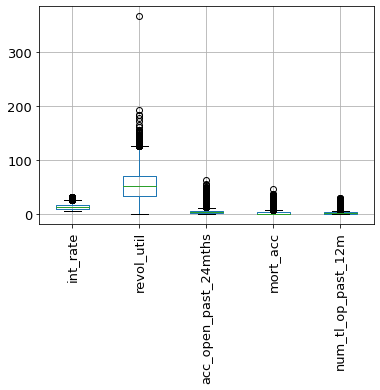

In [86]:
data_lc.boxplot(column=columns_boxplot, rot = 90)

We see 'revol_util' has an extremely large value. In the decription we see it is 366. We would like to drop this row to avoid bias.

In [87]:
data_lc = data_lc.drop(data_lc[data_lc['revol_util'] > 300].index)

Now again let's check the distribution. 

<AxesSubplot:>

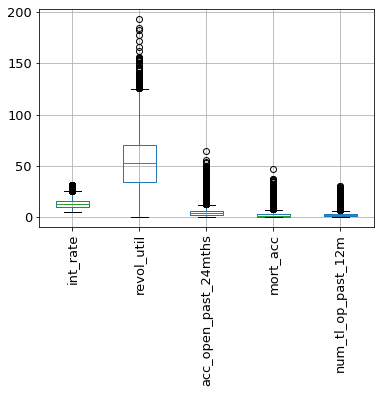

In [88]:
data_lc.boxplot(column=columns_boxplot, rot = 90)

Although we see quite a few outliners on those columns, the outliners are continuous. So we would keep them as like that.

Next we would like to see the loan amount.

<AxesSubplot:>

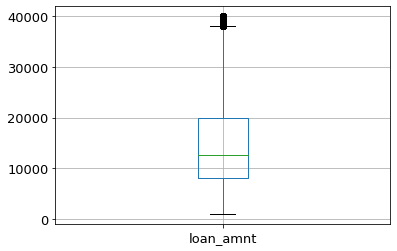

In [89]:
data_lc.boxplot('loan_amnt')

It looks fine. Let's then look at annual income.

<AxesSubplot:>

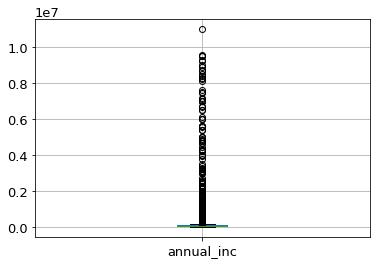

In [90]:
data_lc.boxplot('annual_inc')

It looks ok. let's then have a look on dti.

<AxesSubplot:>

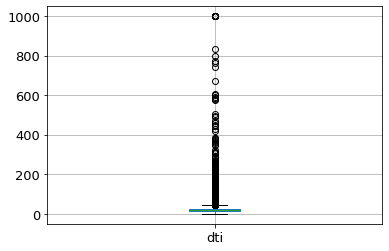

In [91]:
data_lc.boxplot('dti')

There are quite some outliners which will bring much bias to our model. We would like to drop rows with values greater than 500.

In [92]:
data_lc = data_lc.drop(data_lc[data_lc['dti'] > 500].index)

<AxesSubplot:>

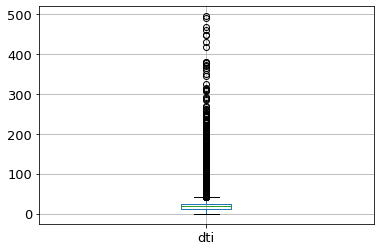

In [93]:
data_lc.boxplot('dti')

From the description above we see the distributions of 'fico_range_high', 'inq_last_6mths', 'last_pymnt_amnt', 'percent_bc_gt_75', 'last_fico_range_low' are reasonable so we will keep them as they are.

Next, total_rec_late_fee. Since it has large amount of zero values, we will only see values above 100.

Text(0, 0.5, 'Count')

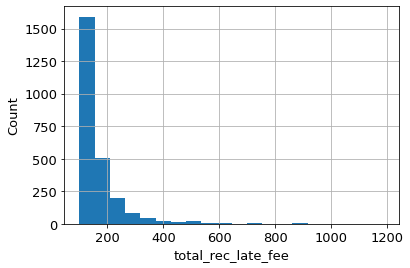

In [94]:
data_lc[data_lc.total_rec_late_fee>100].total_rec_late_fee.hist(bins=20)
plt.xlabel('total_rec_late_fee')
plt.ylabel('Count')

It looks fine. We will keep it as it is.

<AxesSubplot:>

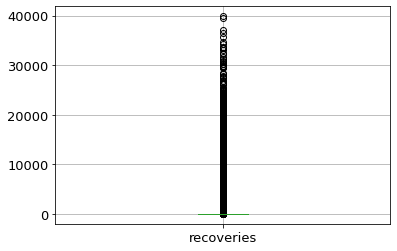

In [95]:
data_lc.boxplot('recoveries')

the 'recoveries' also looks fine. We would like to keep it as it is.

Let's see 'tot_hi_cred_lim'.

<AxesSubplot:>

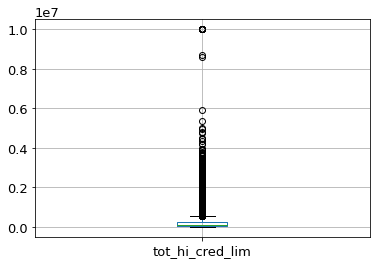

In [96]:
data_lc.boxplot('tot_hi_cred_lim' )

A few quite high values are found. To avoid bias let's change drop rows with values greater than 6,000,000. 

In [97]:
data_lc = data_lc.drop(data_lc[data_lc['tot_hi_cred_lim'] > 6000000].index)

<AxesSubplot:>

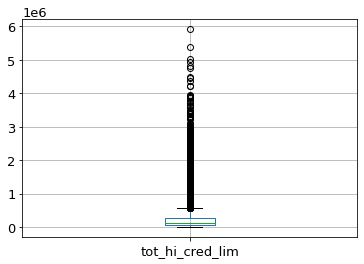

In [98]:
data_lc.boxplot('tot_hi_cred_lim' )

<AxesSubplot:>

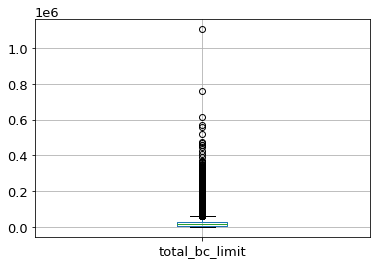

In [99]:
data_lc.boxplot('total_bc_limit' )

We want to remove outliners with too high total_bc_limit.

In [100]:
data_lc = data_lc.drop(data_lc[data_lc['total_bc_limit'] > 600000].index)

Now let's drop the month in column "earliest_cr_line" and only keep the year.

In [101]:
data_lc.earliest_cr_line      

0          Aug-2003
1          Dec-1999
2          Aug-2000
4          Jun-1998
5          Oct-1987
             ...   
2260688    Jul-2004
2260690    Mar-2002
2260691    Jun-2011
2260692    Aug-1997
2260697    Jul-1999
Name: earliest_cr_line, Length: 1188428, dtype: object

In [102]:
earliest_cr_line_year = []
for i in data_lc['earliest_cr_line']:
    earliest_cr_line_year.append(i[-4:])

In [103]:
data_lc['earliest_cr_line_year'] = earliest_cr_line_year

In [104]:
data_lc.drop(columns='earliest_cr_line',inplace=True)

In [105]:
data_lc.head().T

,0,1,2,4,5
loan_amnt,3600.0,24700.0,20000.0,10400.0,11950.0
term,36 months,36 months,60 months,60 months,36 months
int_rate,13.99,11.99,10.78,22.45,13.44
grade,C,C,B,F,C
emp_length,10+ years,10+ years,10+ years,3 years,4 years
home_ownership,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,RENT
annual_inc,55000.0,65000.0,63000.0,104433.0,34000.0
loan_status,1,1,1,1,1
purpose,debt_consolidation,small_business,home_improvement,major_purchase,debt_consolidation
dti,5.91,16.06,10.78,25.37,10.2


In [106]:
# sort column names and reset index
data_lc.reindex(sorted(data_lc.columns), axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188428 entries, 0 to 2260697
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   acc_open_past_24mths   1188428 non-null  float64 
 1   annual_inc             1188428 non-null  float64 
 2   application_type       1188428 non-null  object  
 3   debt_settlement_flag   1188428 non-null  object  
 4   disbursement_method    1188428 non-null  object  
 5   dti                    1188428 non-null  float64 
 6   earliest_cr_line_year  1188428 non-null  object  
 7   emp_length             1188428 non-null  object  
 8   fico_range_high        1188428 non-null  float64 
 9   grade                  1188428 non-null  object  
 10  home_ownership         1188428 non-null  object  
 11  initial_list_status    1188428 non-null  object  
 12  inq_last_6mths         1188428 non-null  float64 
 13  int_rate               1188428 non-null  float64 
 14  la

# 8. Write data to file, conclusions

So in our final data after the wrangling, we have 1188428 rows and 28 columns.

In [109]:
file_name = '../Data/lending_club_data.csv'
data_lc.to_csv(file_name, index=False)

Conclusion:
    
    In this data wrangling process, a few steps have been done to make our data tidy and ready for next step, which is listed as follows:
    1. Missing values are checked, and columns with too many missing values (>30%) are dropped.
    2. Check correlations among all numerical columns, and columns with high correlation with others are dropped.
    3. Check the correlation between target column and other numerical columns, and drop columns with poor correlation.
    4. Study the categorical columns and remove columns which is believed to have little impact to our target column.
    5. Rows with missing value are dropped.
    6. Boxplots were created on numerical columns, rows with abnormal outliners are removed.
    7. The clean data was saved to a CSV file.